# Worksheet 12

Name:  Erwin Pimentel
UID: U97810050

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

Examples 1) and 3) are both examples of classifications because they involve categorizing things into individual classes with labels. Examples 2) and 4) are not examples of classification because they have to deal with continuous number predictions rather than classifying the data into classes.

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

Given a dataset, in order to set things up such that you can both learn a model and get an idea for how the model might perform on unseen data, you would first split the data into two sets: A training set and a testing set (and optionally a validation set). You would then use the training set to train the model and use the testing set to evaluate its performance once it has trained long enough. Based on how well the model does on the testing set is a good base for how it might perform on more unseen data!

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting: this occurs when a ML is too simple to capture the patterns in the data and fails to learn the training data effectively. Some signs to look out for would be high training error and high testing error, essentially performing very poorly on both the training and testing datasets.

Overfitting: this occurs when an ML is too complex and overanalyzes the training data such that it doesn't egneralize well to new unseen data. Some signs to look out for are having very low training error but very high testing error, meaning the model can perform well on the training set because it learns it very well but it fails to adapt to new data.

### K Nearest Neighbors

In [7]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

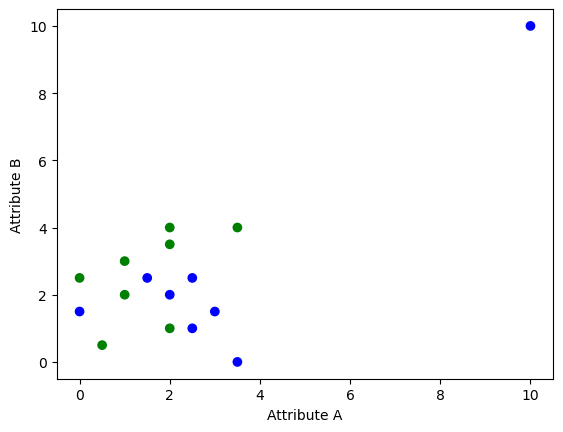

In [8]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

Yes there is one extreme outlier in the data located at (10,10)

Number of outliers removed: 1


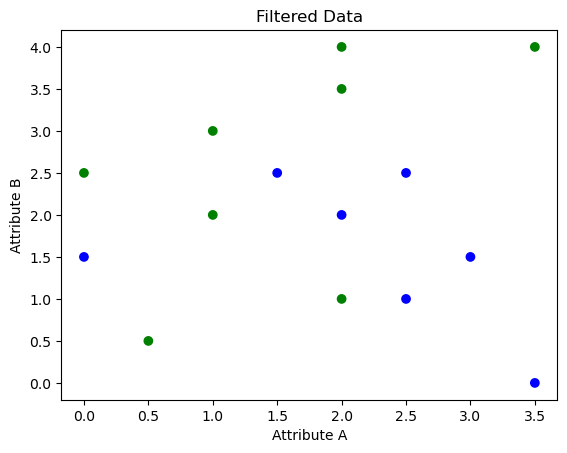

In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Calculate z-scores for the data
z_scores_A = np.abs(stats.zscore(data["Attribute A"]))
z_scores_B = np.abs(stats.zscore(data["Attribute B"]))

# Define a threshold for considering a point as an outlier (e.g., z-score > 2)
threshold = 2

# Identify outliers in both attributes
outliers = np.logical_or(z_scores_A > threshold, z_scores_B > threshold)

# Remove the outliers from the dataset
filtered_data = {
    "Attribute A": [data["Attribute A"][i] for i, is_outlier in enumerate(outliers) if not is_outlier],
    "Attribute B": [data["Attribute B"][i] for i, is_outlier in enumerate(outliers) if not is_outlier],
    "Class": [data["Class"][i] for i, is_outlier in enumerate(outliers) if not is_outlier],
}

print("Number of outliers removed:", sum(outliers))

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(filtered_data["Attribute A"], filtered_data["Attribute B"], color=colors[filtered_data["Class"]].tolist())
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("Filtered Data")
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

There is not enough context in the given data to decide what is noise and what is not. However, the original outlier removed in the earlier problems could be a prime example of noise in this dataset.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

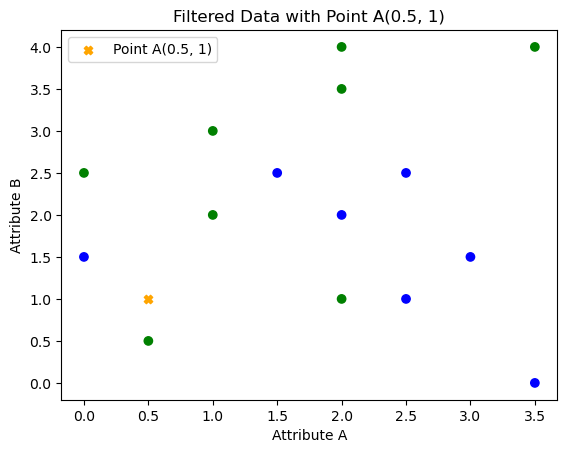

In [10]:
# Plot the filtered data with point A(0.5, 1) in a different color
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(filtered_data["Attribute A"], filtered_data["Attribute B"], color=colors[filtered_data["Class"]].tolist())
plt.scatter(0.5, 1, color='orange', marker='X', label='Point A(0.5, 1)')
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("Filtered Data with Point A(0.5, 1)")
plt.legend()
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

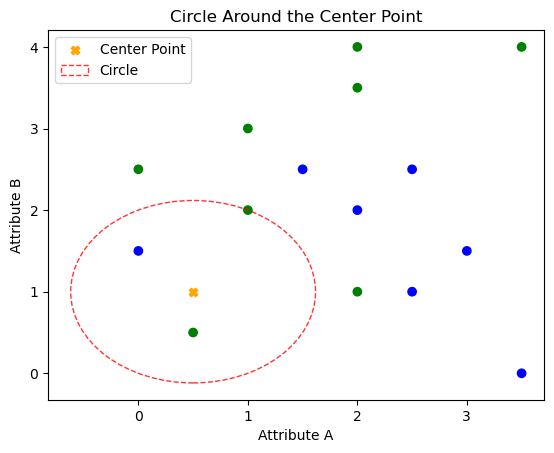

3 Closest Points:
Attribute A: 0.5 Attribute B: 0.5 Class: 1
Attribute A: 1 Attribute B: 2 Class: 1
Attribute A: 0 Attribute B: 1.5 Class: 0


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    # Compute the Euclidean distance between two points in 2D space.
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def n_closest_to(data, location, n):
    distances = []  # Store the distances from the location to all other points

    for i in range(len(data["Attribute A"])):
        point = (data["Attribute A"][i], data["Attribute B"][i])
        distance = euclidean_distance(location, point)
        distances.append(distance)

    # Find the n closest points to the location
    closest_indices = np.argpartition(distances, n)[:n]

    # Find the farthest distance among the n closest points
    farthest_distance = max(distances[i] for i in closest_indices)

    # Plot the data points and the circle
    colors = np.array([x for x in 'bgrcmyk'])
    plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
    plt.scatter(location[0], location[1], color='orange', marker='X', label='Center Point')

    # Draw a circle centered around the location with radius equal to the farthest of the n points
    circle = plt.Circle(location, farthest_distance, fill=False, alpha=0.8, color='red', linestyle='dashed', label='Circle')
    plt.gca().add_patch(circle)

    plt.xlabel("Attribute A")
    plt.ylabel("Attribute B")
    plt.title("Circle Around the Center Point")
    plt.legend()
    plt.show()

    # Return the n closest points
    closest_points = []
    for i in closest_indices:
        closest_points.append({
            "Attribute A": data["Attribute A"][i],
            "Attribute B": data["Attribute B"][i],
            "Class": data["Class"][i]
        })

    return closest_points

location = (0.5, 1)
n = 3
closest_points = n_closest_to(filtered_data, location, n)

print("3 Closest Points:")
for point in closest_points:
    print("Attribute A:", point["Attribute A"], "Attribute B:", point["Attribute B"], "Class:", point["Class"])


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

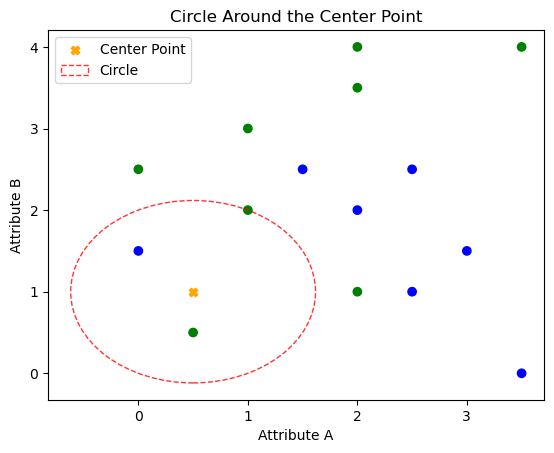

Majority Class Assigned to the Center Point: 1


In [16]:
def majority_class(points):
    # Count the occurrences of each class
    class_counts = {0: 0, 1: 0}  # Assuming binary classes (0 and 1)

    for point in points:
        class_counts[point["Class"]] += 1

    # Determine the majority class
    majority_class = max(class_counts, key=class_counts.get)

    return majority_class

closest_points = n_closest_to(filtered_data, location, n)
result_class = majority_class(closest_points)
print("Majority Class Assigned to the Center Point:", result_class)

g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [17]:
count = 0
total_points = len(filtered_data["Attribute A"])

for i in range(total_points):
    # Consider the i-th point as the test set and the rest as the training set
    test_point = {
        "Attribute A": filtered_data["Attribute A"][i],
        "Attribute B": filtered_data["Attribute B"][i],
        "Class": filtered_data["Class"][i]
    }

    # Create a training set without the test point
    training_set = [point for j, point in enumerate(closest_points) if j != i]

    # Use the majority_class function to classify the test point
    prediction = majority_class(training_set)

    # Check if the prediction matches the actual class
    actual_class = test_point["Class"]
    if prediction == actual_class:
        count += 1

# Calculate the overall testing accuracy
overall_accuracy = count / total_points

print("Overall Testing Accuracy = {:.2%}".format(overall_accuracy))


Overall Testing Accuracy = 53.33%
